In [142]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [43]:
#import dataset

bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [45]:
# describing the columns of dataframe

bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [49]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [51]:
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [53]:
bike_df.shape

(730, 16)

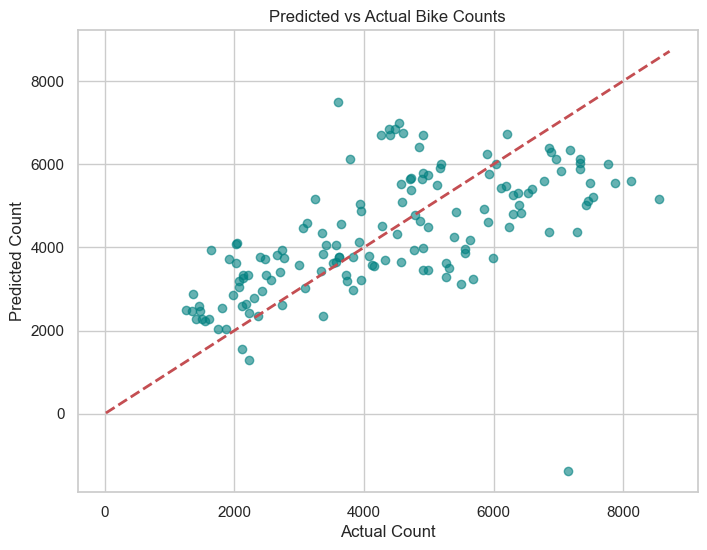

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv("day.csv")  # Replace with actual file path
# Define independent and dependent variables
X = df[['temp', 'atemp', 'hum', 'windspeed']]  # Features
y = df['cnt']  # Target variable (actual count)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Plot Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)  # Reference line
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title("Predicted vs Actual Bike Counts")
plt.grid(True)
plt.show()

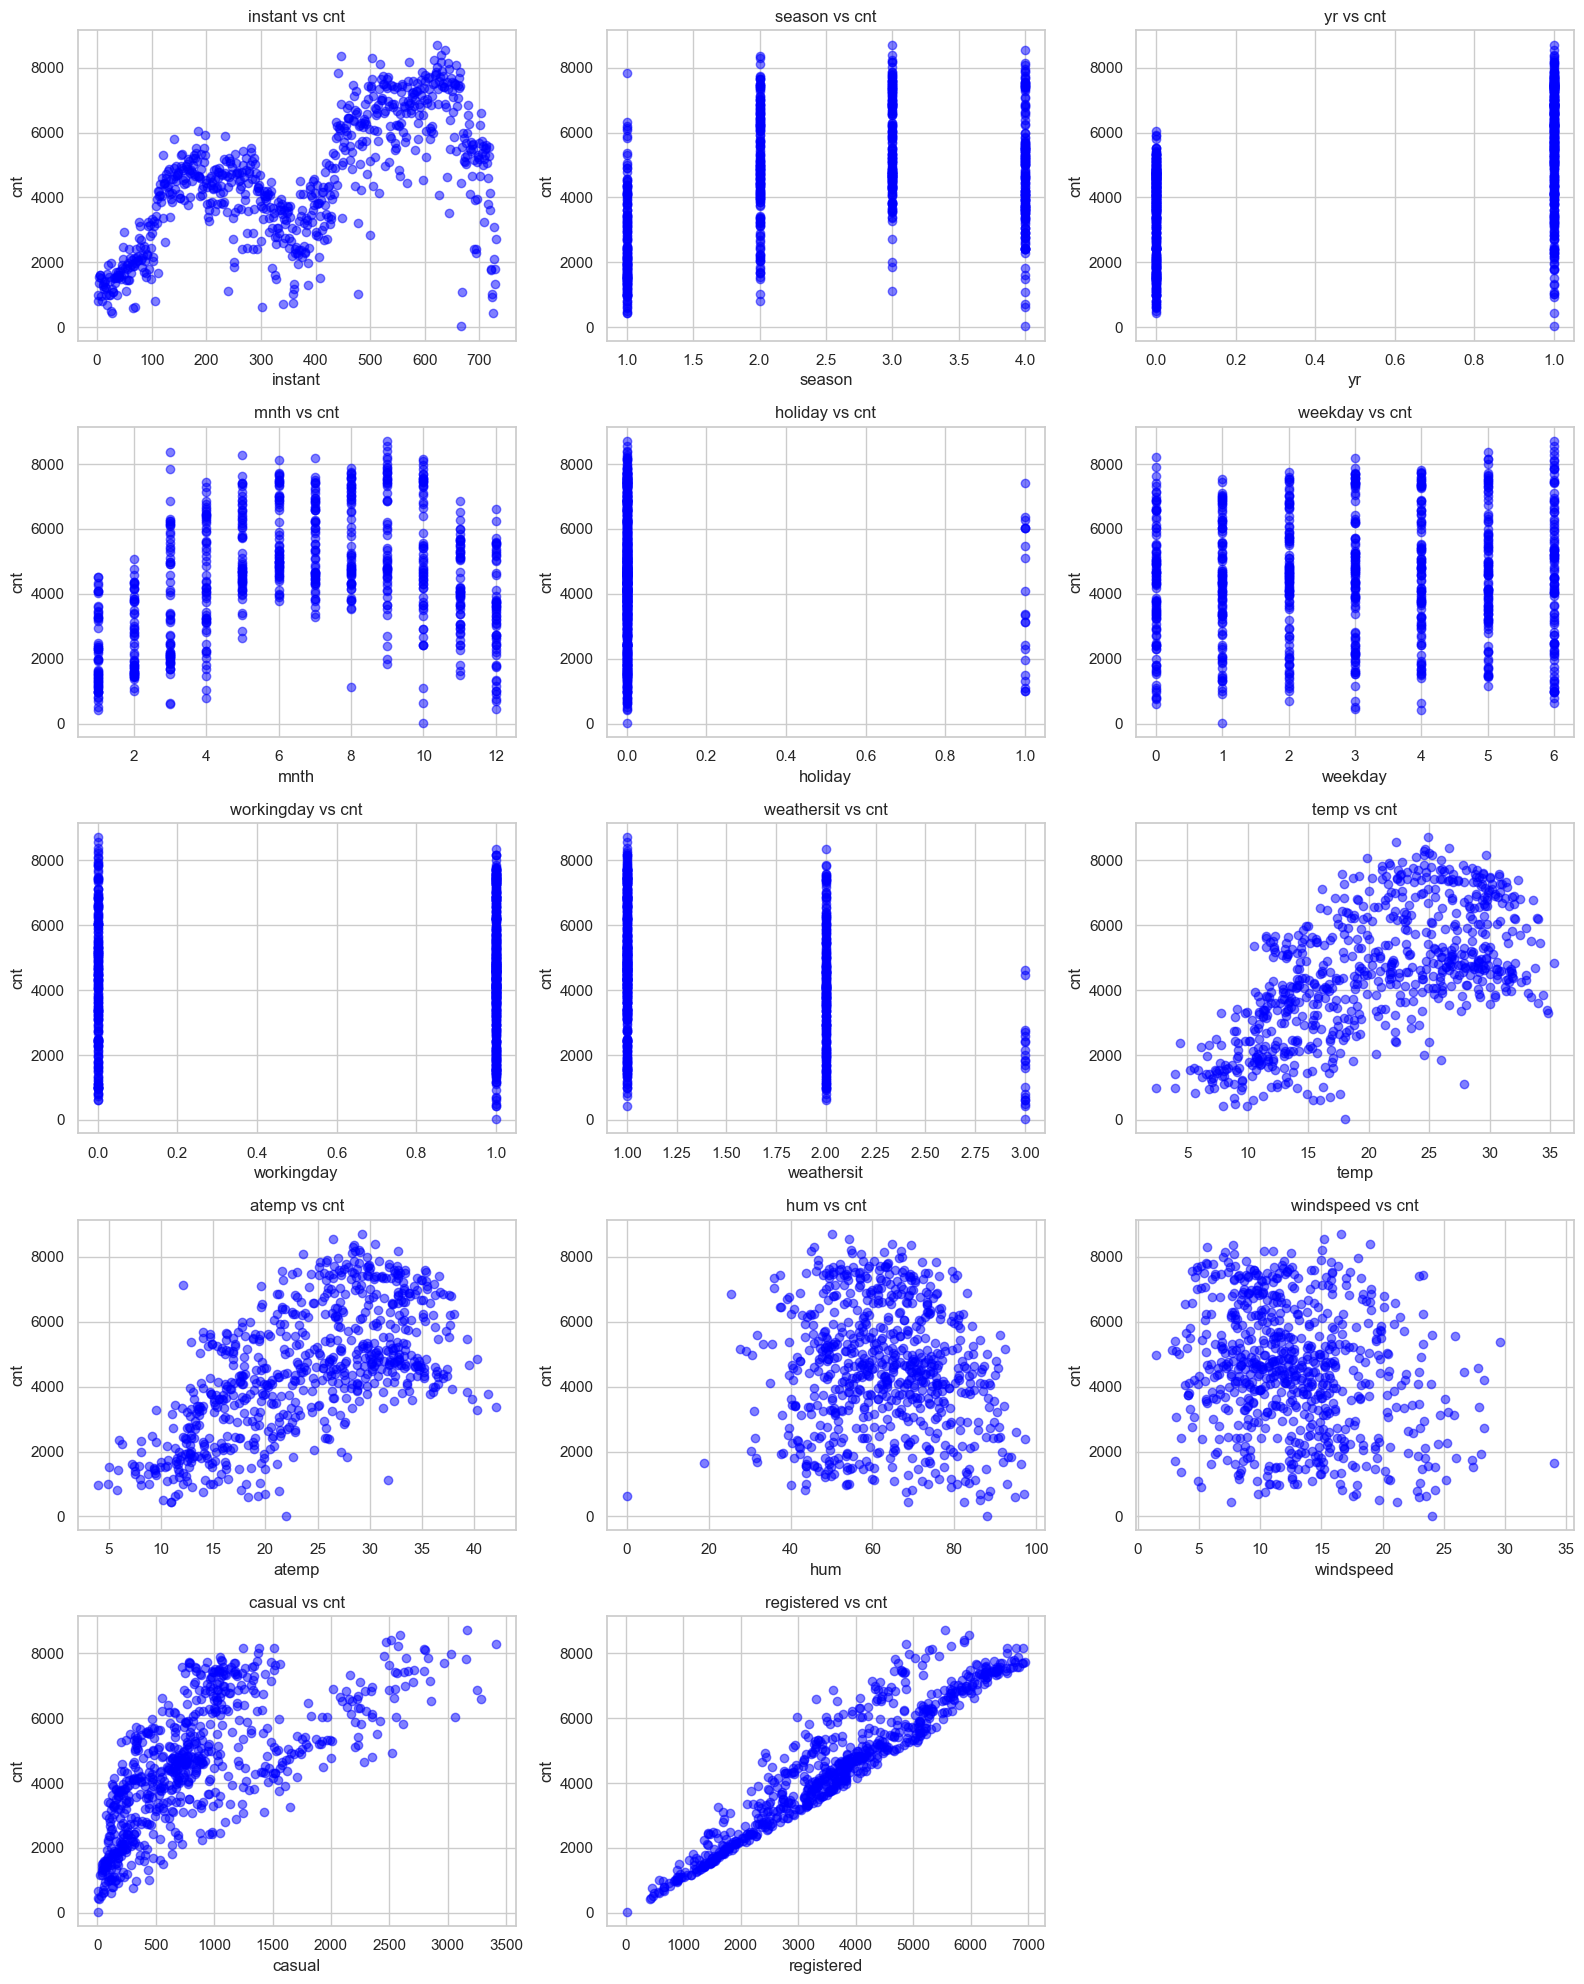

In [117]:
# Considered "cnt" as the dependent variable
dependent_var = 'cnt'

# Dynamically adjusting the number of rows and columns for subplots
num_features = len(numerical_data.drop(columns=[dependent_var], errors='ignore').columns)
rows = (num_features // 3) + (num_features % 3 > 0)  # Calculate rows needed for 3 columns
plt.figure(figsize=(16, rows * 4))
# Plotting scatter plots for each numerical feature against the dependent variable
for i, column in enumerate(numerical_data.drop(columns=[dependent_var], errors='ignore').columns, 1):
    plt.subplot(rows, 3, i)
    plt.scatter(data[column], data[dependent_var], alpha=0.5, color='blue')
    plt.title(f'{column} vs {dependent_var}')
    plt.xlabel(column)
    plt.ylabel(dependent_var)
plt.tight_layout()
plt.show()

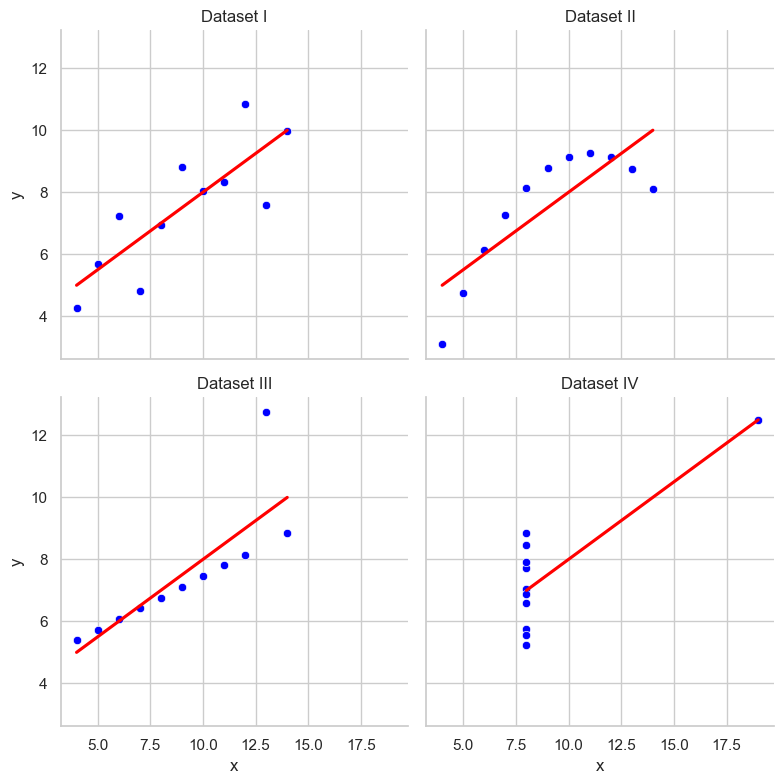

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load Anscombe's quartet dataset from Seaborn
anscombe = sns.load_dataset("anscombe")
# Create scatter plots for each dataset
sns.set(style="whitegrid")
# Set up a FacetGrid for multiple plots
g = sns.FacetGrid(anscombe, col="dataset", col_wrap=2, height=4)
# Scatter plot
g.map(sns.scatterplot, "x", "y", color="blue")
# Add linear regression lines without confidence intervals
g.map(sns.regplot, "x", "y", scatter=False, color="red", ci=None)
# Set title for each subplot
g.set_titles("Dataset {col_name}")
# Show the plots
plt.show()

In [121]:
# Converting dummy variables to integer type for clarity and consistency
categorical_columns = data.select_dtypes(include=['object']).columns

# Creating dummy variables and ensuring integer type
data_dummies_int = pd.get_dummies(data, columns=categorical_columns, drop_first=True).astype(int)
# Displaying the first few rows of the updated dataset
data_dummies_int.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,dteday_31-05-2018,dteday_31-05-2019,dteday_31-07-2018,dteday_31-07-2019,dteday_31-08-2018,dteday_31-08-2019,dteday_31-10-2018,dteday_31-10-2019,dteday_31-12-2018,dteday_31-12-2019
0,1,1,0,1,0,6,0,2,14,18,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,1,0,0,0,2,14,17,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,1,0,1,1,1,8,9,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,1,0,2,1,1,8,10,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,1,0,3,1,1,9,11,...,0,0,0,0,0,0,0,0,0,0


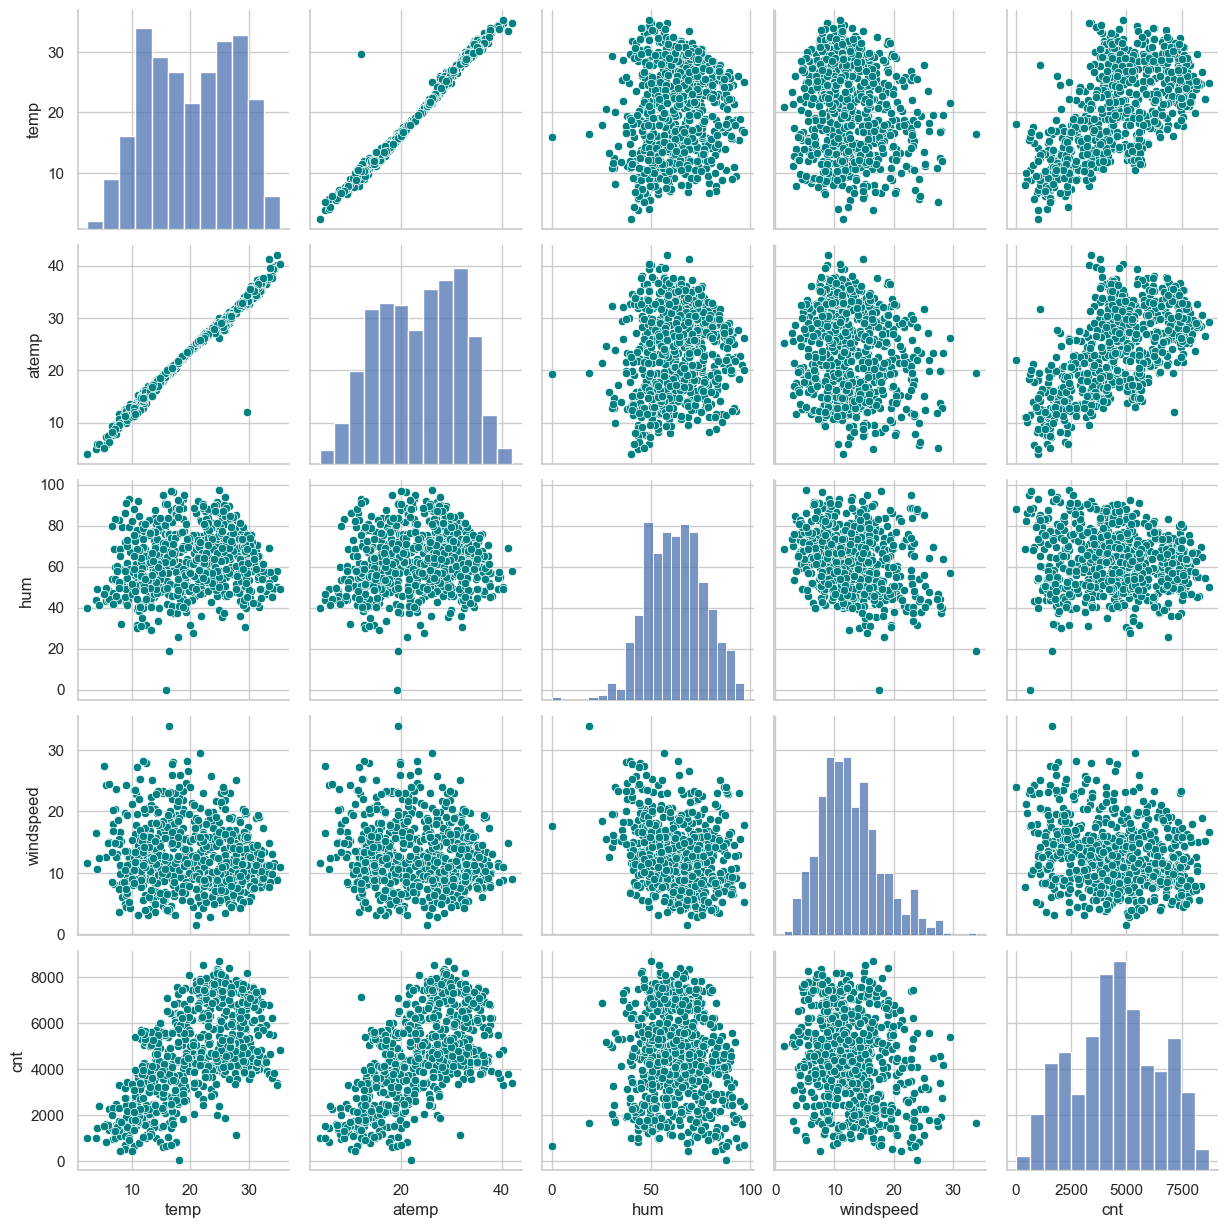

In [126]:
#pair-plot and correlation analysis

sns.pairplot(data, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'], plot_kws={'color': 'teal'})
plt.show()

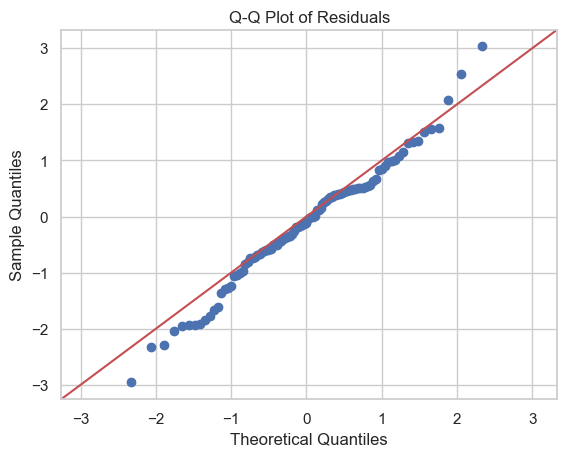

In [63]:
#Q-Q plot

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
# Simulated residuals (e.g., from a linear regression model)
residuals = np.random.normal(loc=0, scale=1, size=100)
# Create Q-Q plot
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [69]:
# Calculate the Variance Inflation Factor (VIF) for the numerical variables
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Load the dataset again with the new file path
file_path = 'day.csv'
data = pd.read_csv(file_path)
# Display the first few rows to confirm the dataset has been loaded correctly
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [71]:
# Dropping irrelevant columns that do not contribute to the model
# 'instant' and 'dteday' are identifiers and dates, which are not useful as predictors here.
data_cleaned = data.drop(columns=['instant', 'dteday'])

# Selecting numerical independent variables for VIF calculation
# Exclude the target variable 'cnt' as it is not a predictor
X = data_cleaned.drop(columns=['cnt', 'casual', 'registered'])
# Adding a constant for VIF calculation
X_with_const = add_constant(X)
# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
# Displaying the VIF values
vif_data.sort_values(by='VIF', ascending=False)

,Feature,VIF
9,atemp,64.298078
8,temp,63.274426
0,const,55.368684
1,season,3.540234
3,mnth,3.327233
10,hum,1.918209
7,weathersit,1.745803
11,windspeed,1.199243
4,holiday,1.083084
6,workingday,1.076342


In [73]:
# Dropping 'atemp' to address the high multicollinearity issue
X_reduced = X.drop(columns=['atemp'])

# Adding a constant for recalculating VIF
X_reduced_with_const = add_constant(X_reduced)
# Recalculating VIF for the reduced set of features
vif_reduced = pd.DataFrame()
vif_reduced['Feature'] = X_reduced_with_const.columns
vif_reduced['VIF'] = [variance_inflation_factor(X_reduced_with_const.values, i) for i in range(X_reduced_with_const.shape[1])]
# Displaying the updated VIF values
vif_reduced.sort_values(by='VIF', ascending=False)

,Feature,VIF
0,const,50.678335
1,season,3.533222
3,mnth,3.325725
9,hum,1.905125
7,weathersit,1.738609
8,temp,1.215146
10,windspeed,1.165212
4,holiday,1.081394
6,workingday,1.076284
5,weekday,1.021473


In [ ]:
Note: temp now has a VIF of 1.22, indicating minimal collinearity

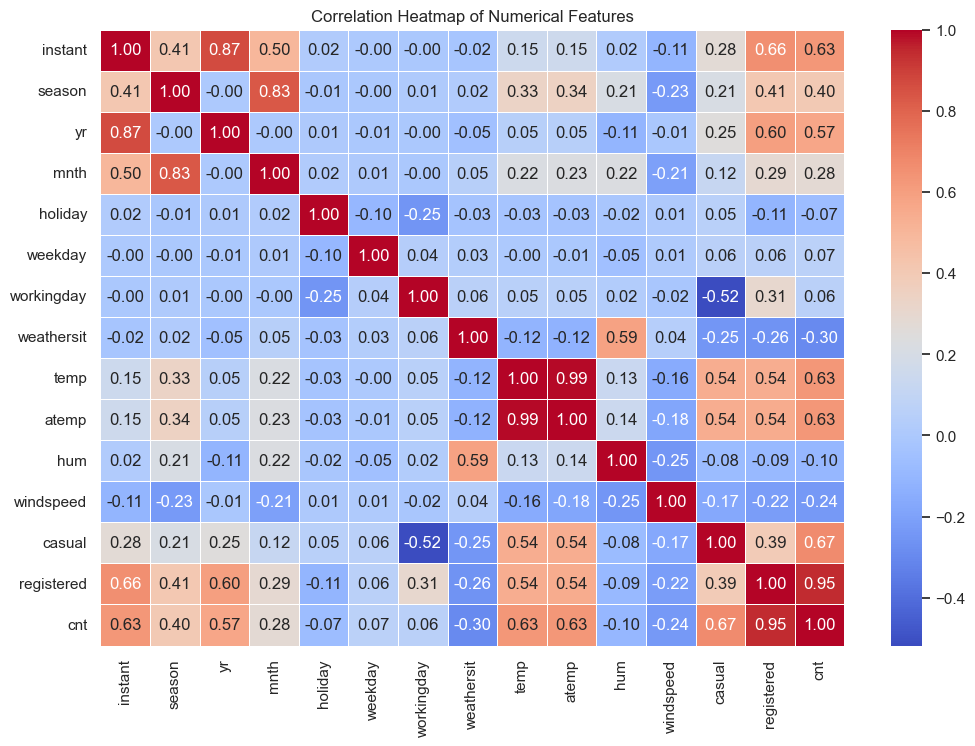

In [113]:
# Reloading the dataset from the new file upload
file_path = 'day.csv'
data = pd.read_csv(file_path)

# Selecting only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['float64', 'int64'])
# Recompute the correlation matrix
correlation_matrix = numerical_data.corr()
# Replotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [132]:
#Building a linear model

import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
# Load dataset
df = pd.read_csv("day.csv")  # Update with correct path if needed
# Define independent and dependent variables
X = df[['temp', 'atemp', 'hum', 'windspeed']]  # Features
y = df['cnt']  # Target variable
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize linear regression model
lr = LinearRegression()
# Perform Recursive Feature Elimination (RFE)
rfe = RFE(lr, n_features_to_select=3)  # Select top 3 features
X_train_rfe = rfe.fit_transform(X_train, y_train)  # Transformed feature set
# Create OLS model using selected features
X_train_rfe_lm_1 = sm.add_constant(X_train_rfe)  # Add intercept
lr_1 = sm.OLS(y_train, X_train_rfe_lm_1).fit()  # Fit model
# Print summary
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     143.5
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           1.52e-69
Time:                        23:09:30   Log-Likelihood:                -5091.7
No. Observations:                 584   AIC:                         1.019e+04
Df Residuals:                     580   BIC:                         1.021e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1321.1184    349.056      3.785      0.0

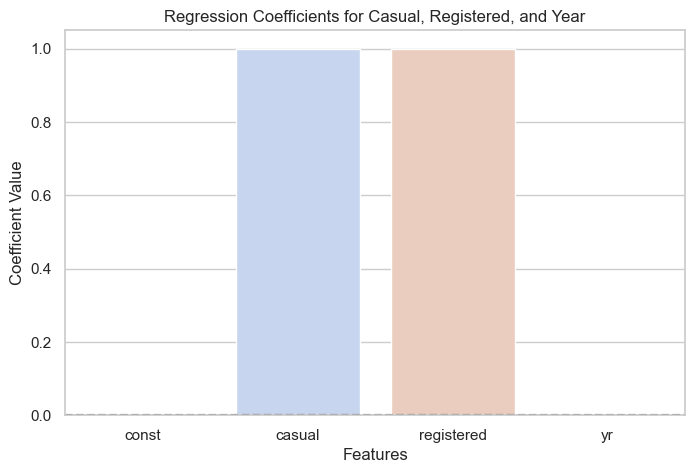

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.127e+32
Date:                Tue, 28 Jan 2025   Prob (F-statistic):               0.00
Time:                        23:14:27   Log-Likelihood:                 15298.
No. Observations:                 584   AIC:                        -3.059e+04
Df Residuals:                     580   BIC:                        -3.057e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.165e-12    1.1e-13    -10.611      0.0

In [138]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("day.csv")  # Update with correct path if needed
# Define independent variables and target
X = df[['casual', 'registered', 'yr']]  # Independent variables
y = df['cnt']  # Dependent variable
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Add constant to X_train
X_train_const = sm.add_constant(X_train)
# Build OLS regression model
model = sm.OLS(y_train, X_train_const).fit()
# Extract coefficients
coefficients = model.params.reset_index()  # Convert to DataFrame
coefficients.columns = ['Feature', 'Coefficient']  # Rename columns
# Fix: Assign `hue` and disable legend
plt.figure(figsize=(8, 5))
sns.barplot(data=coefficients, x="Feature", y="Coefficient", hue="Feature", palette="coolwarm", legend=False)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Regression Coefficients for Casual, Registered, and Year")
plt.axhline(y=0, color='black', linestyle='--')
plt.show()
# Print summary of the model
print(model.summary())